In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('C:\\Users\\gouri\\Downloads\\disney_plus_titles.csv')

In [5]:
# Display the first few rows
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...


In [6]:
df.shape

(1368, 12)

In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB


In [8]:
df.isnull().sum()

show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [9]:
df['director'] = df['director'].fillna('without director reference')
df['cast'] = df['cast'].fillna('without cast reference')
df['country'] = df['country'].fillna('without country reference')
df['rating'] = df['rating'].fillna('without rating')

# Filling remaining null values with 0
df.fillna(0, inplace=True)
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [10]:
df.duplicated().sum()


np.int64(0)

In [11]:
df[['g1','g2','g3']] = df['listed_in'].str.split(',', expand=True)

In [12]:
df.drop(['show_id', 'description', 'listed_in'], axis = 1 ,inplace = True)

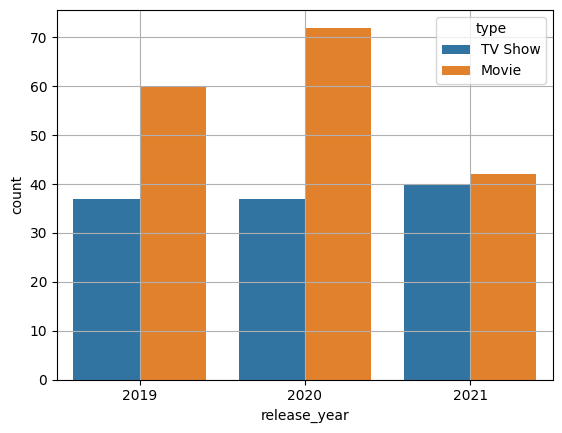

In [13]:

b = df.query('release_year == [2020,2021,2019]')
sns.countplot(b, x = 'release_year', hue = 'type')
plt.grid(True)
plt.show()

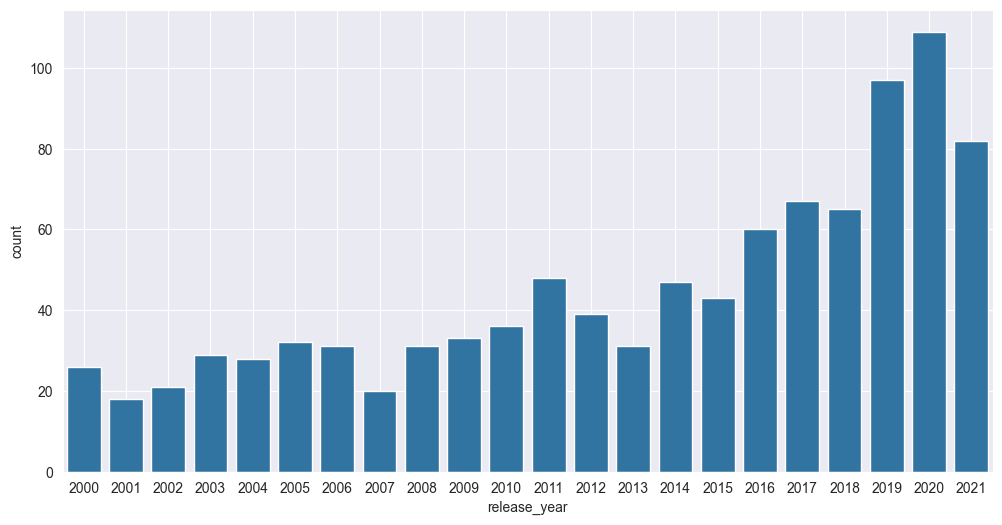

In [14]:
a = df.query('release_year >= 2000')
plt.figure(figsize = (12,6))
sns.set_style('dark')
sns.countplot(a, x = 'release_year')
plt.grid(True)
plt.show()

In [15]:
z = df['rating'].value_counts()
z

rating
TV-G              307
TV-PG             275
G                 235
PG                227
TV-Y7             130
TV-14              72
PG-13              60
TV-Y               48
TV-Y7-FV           12
without rating      2
Name: count, dtype: int64

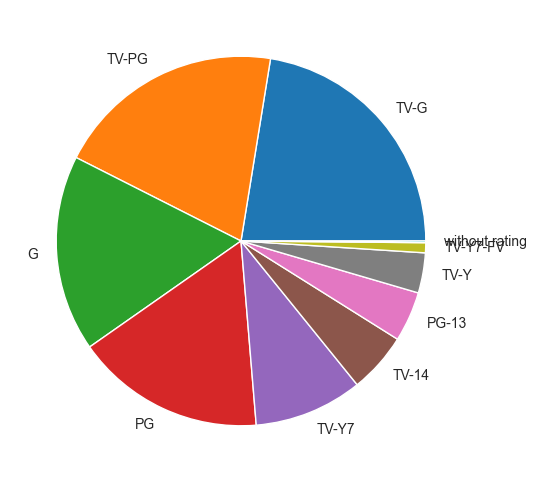

In [16]:
plt.figure(figsize = (6,6))
plt.pie(z, labels = ['TV-G', 'TV-PG', 'G', 'PG', 'TV-Y7', 'TV-14', 'PG-13', 'TV-Y', 'TV-Y7-FV', 'without rating'])
plt.show()

In [17]:
p = df['type'].value_counts()
p

type
Movie      991
TV Show    377
Name: count, dtype: int64

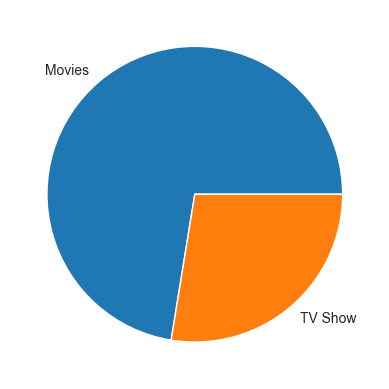

In [18]:
plt.pie(p, labels = ['Movies', 'TV Show'])
plt.show()